# HV notebook demo

This notebook is an interactive tutorial about how to use the HV algorithm.

## Simple example

Bellow an example of how to run HV


In [1]:
import sys
sys.path.append('../../allgo')

import allgo as ag
print(ag.__version__)
print(ag.__file__)

import imageio
import matplotlib.pyplot as plt
from ipywidgets import interact_manual

import ntpath
from IPython.display import clear_output

print("Dependencies imported")

0.2.0
../../allgo/allgo/__init__.py
Dependencies imported


## Load the data

In this section we load the data and display it in a interactive viewer

Image loaded


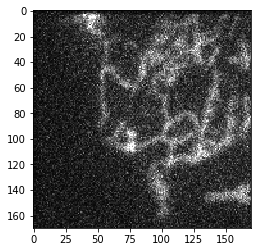

In [2]:
# visualize input image
input_image_path = '../Data/ndsafir.tif'
input_image = imageio.imread(input_image_path)
plt.imshow(input_image,cmap='gist_gray')
print("Image loaded")

## Connection to Allgo 

In [3]:
token = None # put your token.
client = ag.Client(token)
print("You have got a connexion to {}".format(client.allgo_url))

You have got a connexion to https://allgo18.inria.fr


## Interactive parameters selection

In [5]:
output_image = None

def run_sv(denoisep,sparsep):
    global output_image

    files = [ input_image_path ]
    params = '-denoisep ' + str(2*denoisep) + ' -sparsep ' + str(sparsep) + ' -algo SV'
    out_dict1 = client.run_job('Cimgdenoising', files = files, params = params)
    job_id = out_dict1['id']
    
    url = out_dict1[str(job_id)]['output.tif']
    outdir = "../Output"
    filepath = client.download_file(file_url = url, outdir = outdir, force=True)
    output_image = imageio.imread(filepath)

    plt.figure(figsize = (10,80))
    plt.subplot(1, 2, 1)                      
    plt.imshow(input_image,cmap = "gist_gray")
    plt.subplot(1, 2, 2)
    plt.imshow(output_image,cmap = "gist_gray")
    plt.show()
    
interact_manual(run_sv, denoisep = (0, 15) , sparsep = (0.1,0.9,0.01))


interactive(children=(IntSlider(value=7, description='denoisep', max=15), FloatSlider(value=0.5, description='…

<function __main__.run_sv(denoisep, sparsep)>